# Popular Data Science Questions

### Introduction
The goal of this project is to determine the best data science content to write about.

We will conduct this analysis as a data scientist working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms.

We've determined that in order to figure out what programming content to write, we could consult Stack Overflow (a question and answer website about programming) and see what kind of content is popular.

Stack Overflow is part of a question and answer website network called Stack Exchange. Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:
* Data Science
* Cross Validated — a statistics site
* Artificial Intelligence
* Mathematics
* Stack Overflow

And if we want to include Data Engineering, we can also consider:
* Database Administrators;
* Unix & Linux;
* Software Engineering;

Data Science Stack Exchange (DSSE) is on the bottom 10 sites with respect to this metric: Stack Exchange websites sorted by percentage of questions that received answers.

The fact that DSSE is a data science dedicated site (contrary to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

### Examine Data Science Stack Exchange

1. What kind of questions are welcome on this site?
ANS - Questions on machine learning, python, deep learning, neural network, classification, natural language processing, time series, etc.
2. What, other than questions, does the site's home subdivide into? Do any of them look useful toward our goal?
ANS - The site is divided into questions, tags, users, companies and unanswered. Tags & unanswered may be useful to our goal.
3. What information is available in each post?
ANS - Title, Up & Down votes, views, days since post was made, post content, tags and answers.

### Stack Exchange Data Explorer
We've decided that the tags will be very useful in categorizing content. To access the data enmasse, Stack Exchange provides a public database for each of its websites.




### Getting the Data
The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:
* Id: An identification number for the post.
* PostTypeId: An identification number for the type of post.
* CreationDate: The date and time of creation of the post.
* Score: The post's score.
* ViewCount: How many times the post was viewed.
* Tags: What tags were used.
* AnswerCount: How many answers the question got (only applicable to question posts).
* FavoriteCount: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
df = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


We'll explore the data to determine answers to the following questions:
* How many missing values are there in each column?
* Can we fix the missing values somehow?
* Are the types of each column adequate?
* What can we do about the Tags column?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

### Cleaning the Data
The FavoriteCount column is the only column with missing data with 84% of its data missing. Given that this column is the only column with missing data, we can either drop the column or replace the missing values with a substitute value. Using the values in the AnswerCount column, we will replace the missing values with 0.

The types for each column are adequate, although we will change the FavoriteCount type to int. We will clean the tags column to separate each tag contained in brackets.

In [5]:
df.fillna(0, inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [6]:
df['Tags'] = df['Tags'].str.replace('^<|>$', '').str.split('><')
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


### Most Used and Most Viewed
We'll now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [7]:
tag_use_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_use_count:
            tag_use_count[tag] += 1
        else:
            tag_use_count[tag] = 1

tag_use_count = pd.DataFrame({'tags':tag_use_count.keys(), 'use_count':tag_use_count.values()})
tag_use_count.sort_values(by='use_count', ascending=False, inplace=True)
tag_use_count.head(20)

,tags,use_count
0,machine-learning,2693
5,python,1814
21,deep-learning,1220
39,neural-network,1055
22,keras,935
57,classification,685
45,tensorflow,584
9,scikit-learn,540
26,nlp,493
23,cnn,489


In [8]:
tag_use_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tags       526 non-null    object
 1   use_count  526 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.3+ KB


<AxesSubplot: ylabel='tags'>

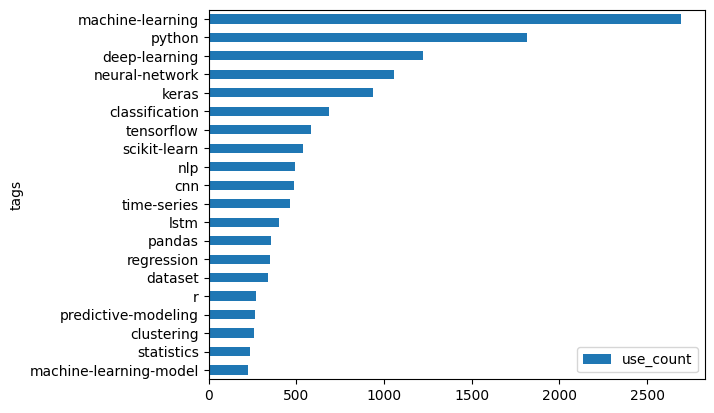

In [9]:
tag_mostused = tag_use_count[:20].sort_values(by='use_count', ascending=True)
tag_mostused.plot(kind='barh', x='tags', y='use_count')

In [10]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_view_count = pd.DataFrame({'tags':tag_view_count.keys(), 'view_count':tag_view_count.values()})
tag_view_count.sort_values(by='view_count', ascending=False, inplace=True)
tag_view_count.head(20)

,tags,view_count
5,python,537585
0,machine-learning,388499
22,keras,268608
21,deep-learning,233628
31,pandas,201787
39,neural-network,185367
9,scikit-learn,128110
45,tensorflow,121369
57,classification,104457
86,dataframe,89352


<AxesSubplot: ylabel='tags'>

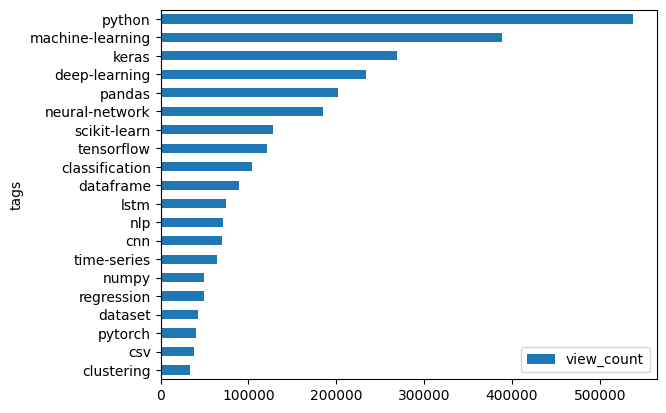

In [11]:
tag_mostviewed = tag_view_count[:20].sort_values(by='view_count', ascending=True)
tag_mostviewed.plot(kind='barh', x='tags', y='view_count')

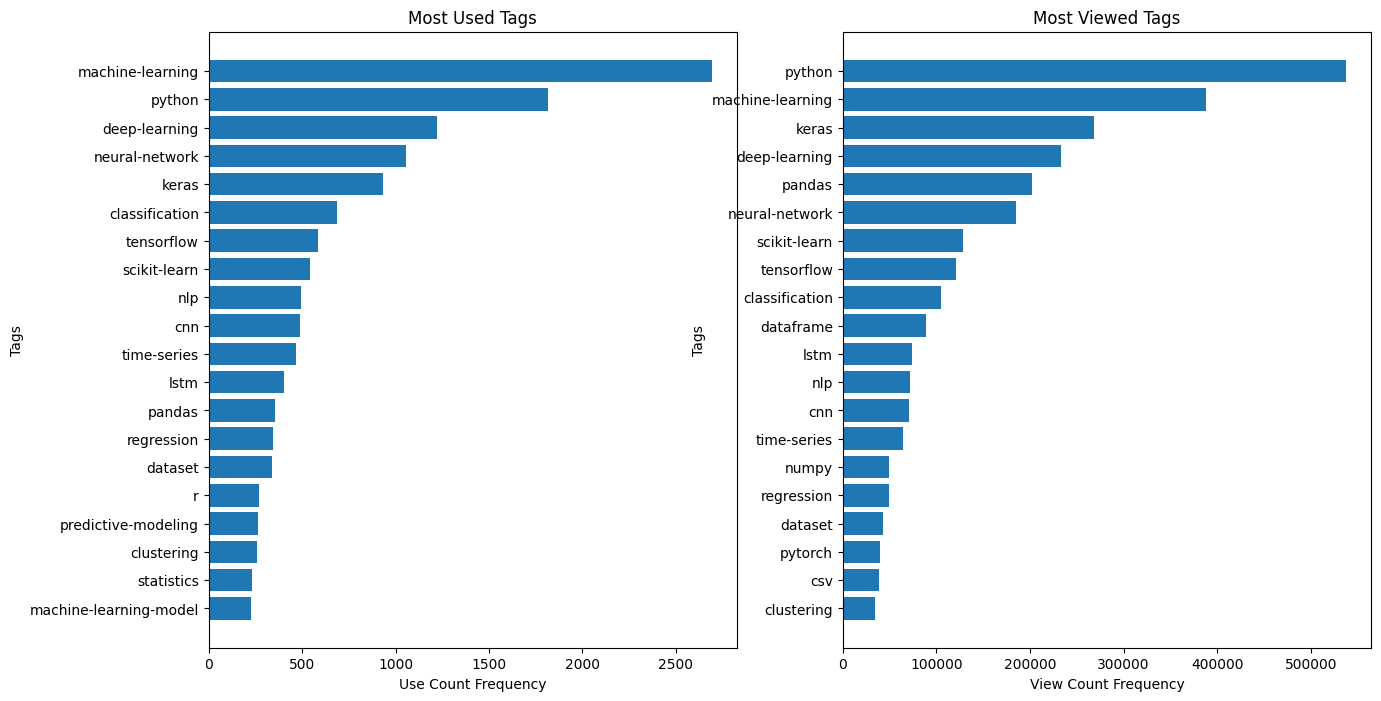

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.barh(tag_mostused['tags'], tag_mostused['use_count'])
plt.title('Most Used Tags')
plt.ylabel('Tags')
plt.xlabel('Use Count Frequency')

plt.subplot(1, 2, 2)
plt.barh(tag_mostviewed['tags'], tag_mostviewed['view_count'])
plt.title('Most Viewed Tags')
plt.ylabel('Tags')
plt.xlabel('View Count Frequency')

plt.show()

array([<AxesSubplot: title={'center': 'view_count'}, ylabel='tags'>],
      dtype=object)

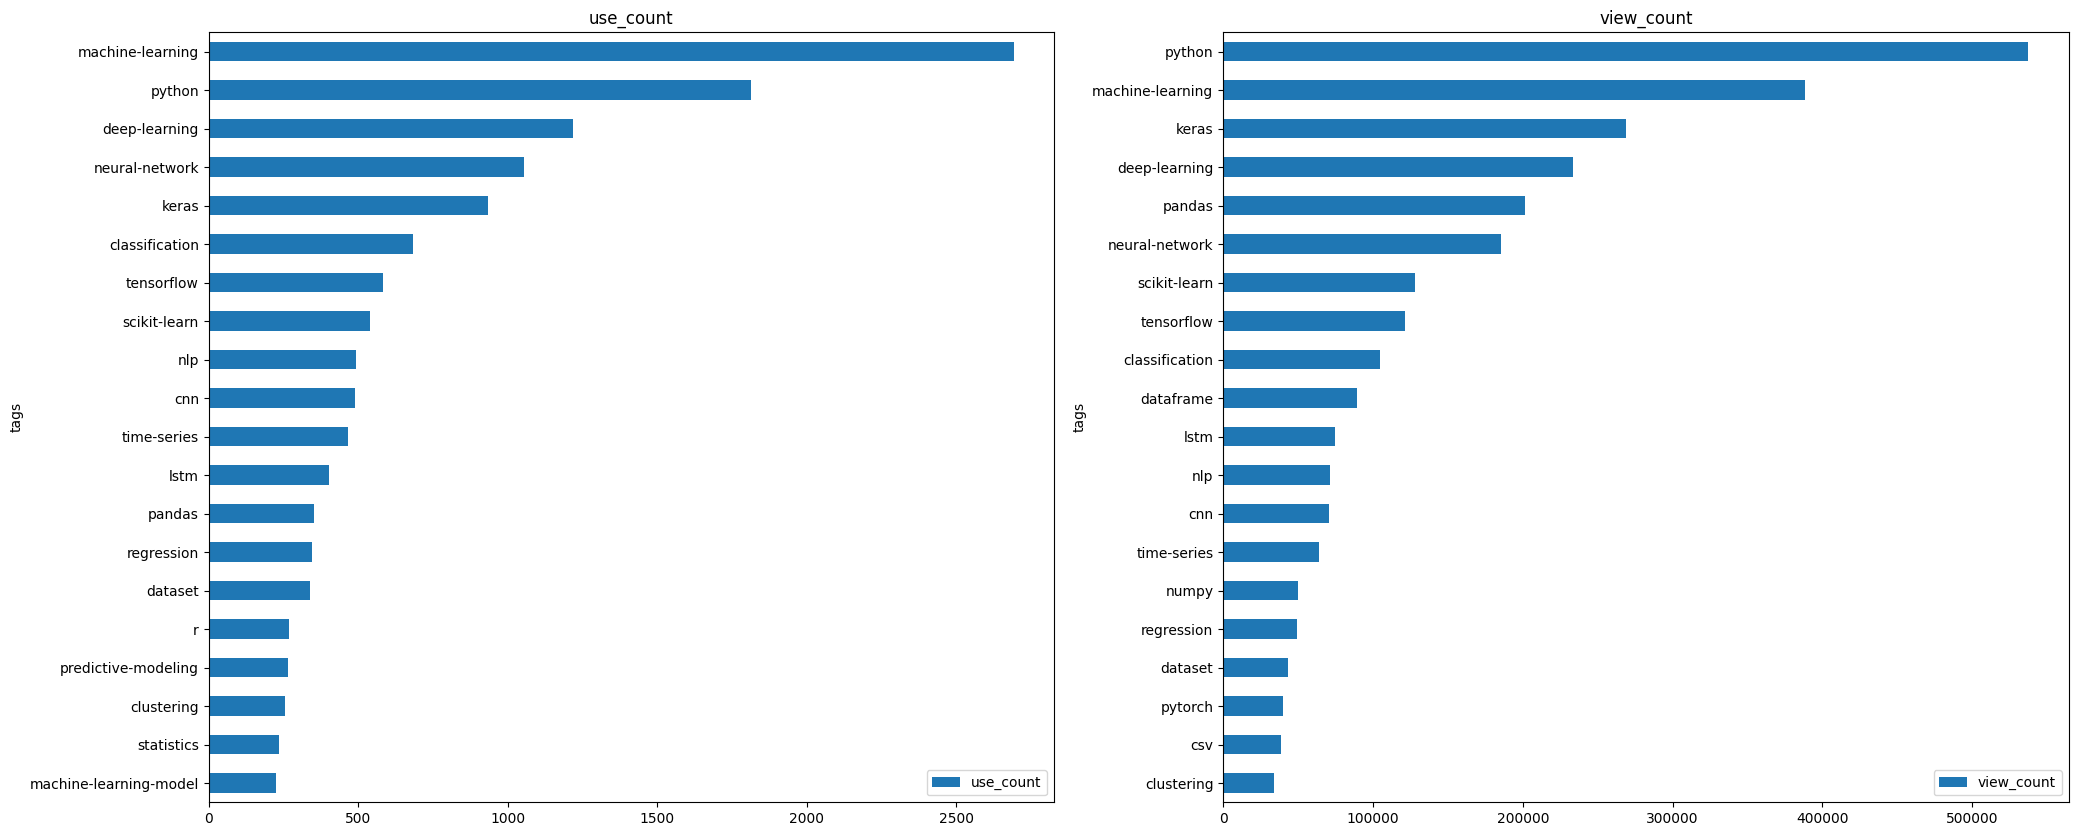

In [13]:
# Alternate Code Same Result
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
tag_mostused.plot(kind="barh", x='tags', y='use_count', ax=axes[0], subplots=True)
tag_mostviewed.plot(kind="barh", x='tags', y='view_count', ax=axes[1], subplots=True)

### Relations Between Tags
Looking at the results from the visual above, we see that most top tags are present in both most used and most viewed dataframes.

We'll see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.

In [14]:
used_viewed_tags = pd.merge(left=tag_mostused, right=tag_mostviewed,
                            how='left', on='tags')
used_viewed_tags

,tags,use_count,view_count
0,machine-learning-model,224,NaN
1,statistics,234,NaN
2,clustering,257,33928.0
3,predictive-modeling,265,NaN
4,r,268,NaN
5,dataset,340,43151.0
6,regression,347,49451.0
7,pandas,354,201787.0
8,lstm,402,74458.0
9,time-series,466,64134.0


In [15]:
viewed_used_tags = pd.merge(left=tag_mostused, right=tag_mostviewed,
                            how='right', on='tags')
viewed_used_tags

,tags,use_count,view_count
0,clustering,257.0,33928
1,csv,NaN,38654
2,pytorch,NaN,40240
3,dataset,340.0,43151
4,regression,347.0,49451
5,numpy,NaN,49767
6,time-series,466.0,64134
7,cnn,489.0,70349
8,nlp,493.0,71382
9,lstm,402.0,74458


The tags present in most_used and not present in most_viewed are:
* machine-learning-model
* statistics
* predictive-modeling
* r

And the tags present in most_viewed but not in most_used are:
* csv
* pytorch
* dataframe

Some tags also stand out as being related. For example, python is related to pandas because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like pandas and r:

In [16]:
df[df["Tags"].apply(lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


### Just a Fad?
Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down?

In [17]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$', '').str.split('><')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


### Questions to be Classified as Deep Learning

In order to decide which questions should be classified as deep learning questions, we'll decide what tags are deep learning tags. A deep learning tag will belong to this list:
* lstm
* cnn
* scikit-learn
* tensorflow
* keras
* neural-network
* deep-learning

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [20]:
def deep_learning_tag(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning_tag)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


We'll track interest in deep learning quarterly over the timeframe period. We'll review the dataset to see the time period range and create a function to identify which quarter a date falls into.

Then, we'll group by quarter and:
* Count the number of deep learning questions.
* Count the total number of questions.
* Determine deep learning questions relative to total number of questions.

In [21]:
all_questions['CreationDate'].min()

Timestamp('2014-05-13 23:58:30')

In [22]:
all_questions['CreationDate'].max()

Timestamp('2020-01-19 03:01:03')

In [32]:
def id_quarter(date):
    year = str(date.year)#[-2:]
    quarter = str(((date.month-1) // 3) + 1)
    return f'{year}Q{quarter}'

all_questions['Quarter'] = all_questions['CreationDate'].apply(id_quarter)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


In [33]:
dl_quarter = all_questions.groupby(by='Quarter').agg({"DeepLearning": ['sum', 'size']})
dl_quarter.columns = ['DeepLearningQuestions', 'TotalQuestions']
dl_quarter['DeepLearningRate'] = dl_quarter['DeepLearningQuestions'] / dl_quarter['TotalQuestions']
dl_quarter.reset_index(inplace=True)

dl_quarter.head()


,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,2014Q2,9,157,0.057325
1,2014Q3,13,189,0.068783
2,2014Q4,21,216,0.097222
3,2015Q1,18,190,0.094737
4,2015Q2,28,284,0.098592


We'll chart deep learning rate against total questions using a combo (line and bar) chart.

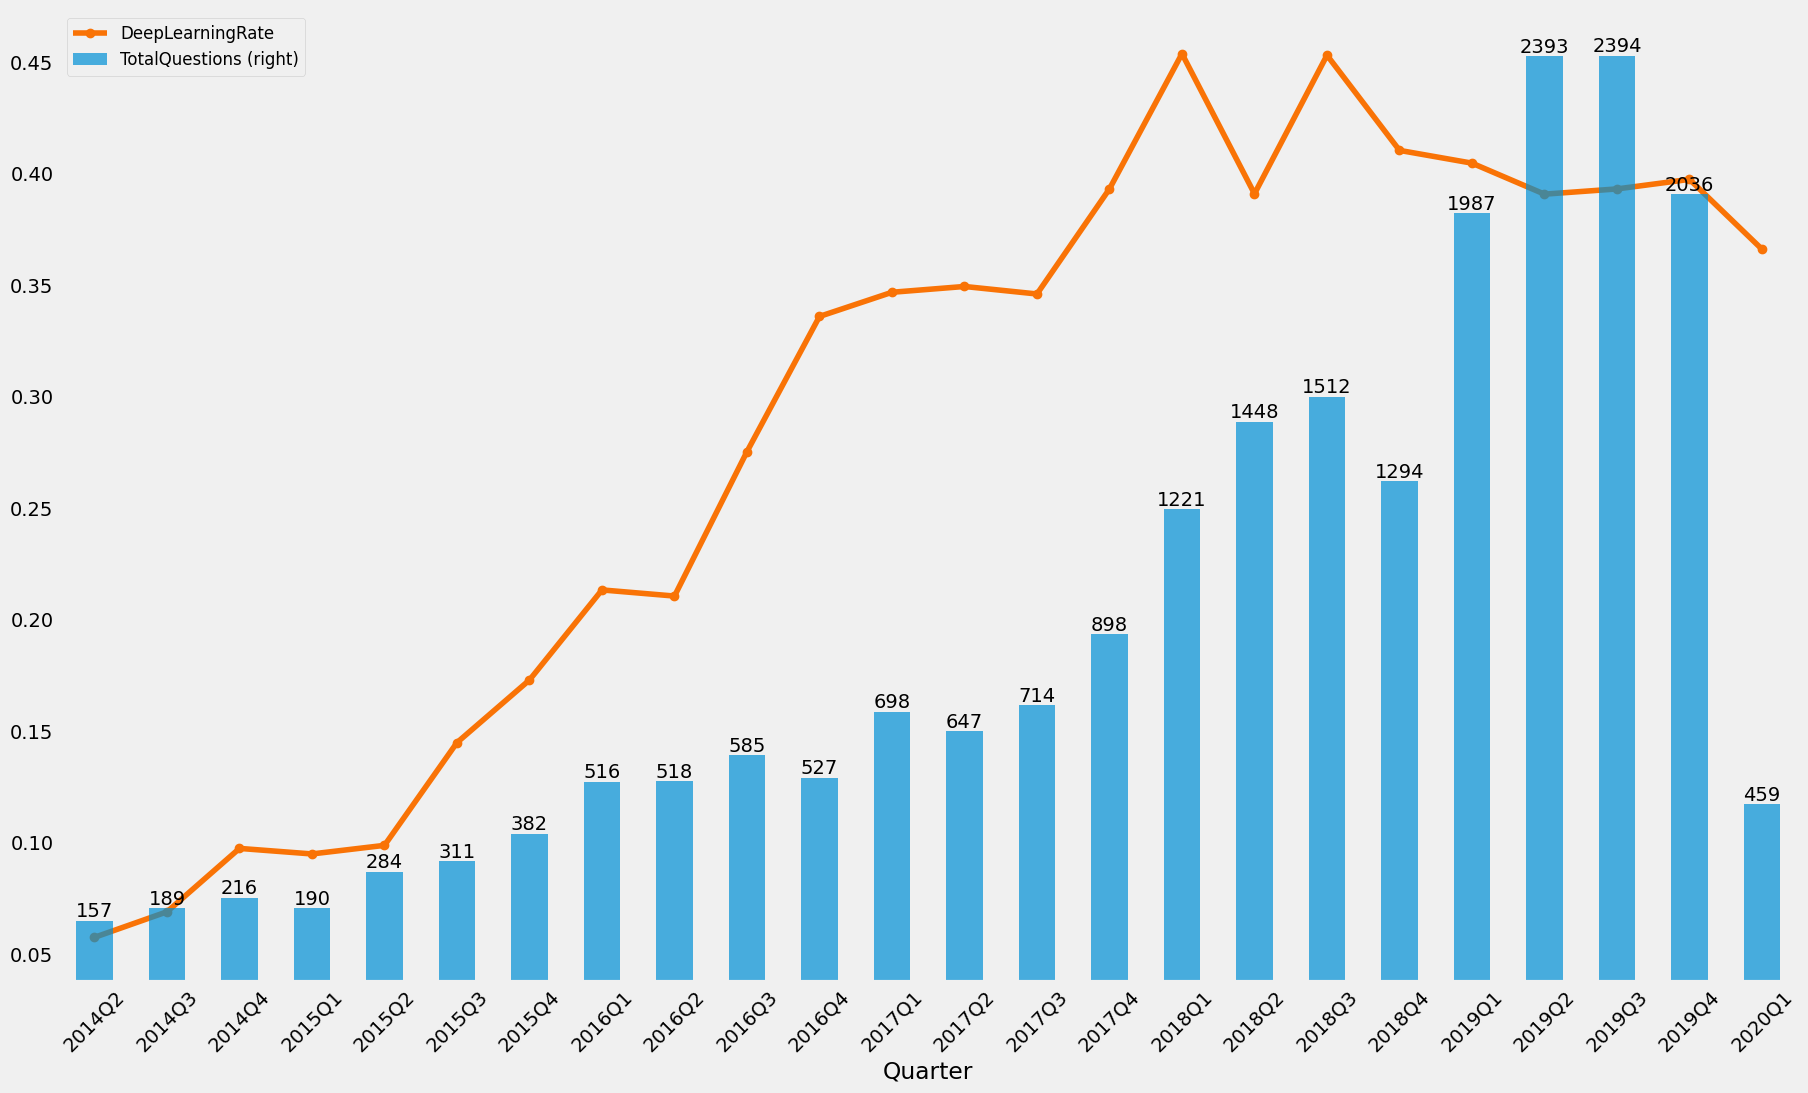

In [36]:
style.use('fivethirtyeight')

# Deep Learning Rate Line Plot
ax1 = dl_quarter.plot(x="Quarter", y="DeepLearningRate", kind="line", color='#F97306',
         marker='o', linestyle="-", figsize=(20,12))

# Total Questions Bar Plot
ax2 = dl_quarter.plot(x="Quarter", y="TotalQuestions", kind="bar", ax=ax1,
         secondary_y=True, alpha=0.7, rot=45)

# Remove spines, ticks and grid
axes = [ax1, ax2]
for ax in axes:
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(right=False, labelright=False)
    ax.grid(visible=False)

# Set text labels, horizontal & vertical alignment
for idx, t in dl_quarter["TotalQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

# Remove legend
ax1.get_legend().remove()

# Set legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

fig.tight_layout()
plt.show()

From the chart, we see that interest in deep learning has increased alongside interest in total questions. Deep learning is clearly not a passing fad but a topic of increasingly important interest in the data science community.

Note that the final bar (2020Q1) is low because our max date is mid-January 2020. Therefore, complete information on Q1 2020 is unavailable. The quarter may be dropped from the chart for a more concise picture.

### Next Steps
* What other content can we recommend that isn't as popular? You can try using association rules to find strong relations between tags.
* What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
* We focused on DSSE. How could we use other related sites to help us with our goal?
* How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?